## About Dataset

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

    Rank - Ranking of overall sales

    Name - The games name

    Platform - Platform of the games release (i.e. PC,PS4, etc.)

    Year - Year of the game's release

    Genre - Genre of the game

    Publisher - Publisher of the game

    NA_Sales - Sales in North America (in millions)

    EU_Sales - Sales in Europe (in millions)

    JP_Sales - Sales in Japan (in millions)

    Other_Sales - Sales in the rest of the world (in millions)

    Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

This is from the front page of Kaggle on this website.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Weird note i just noticed, there is a 3 unit count difference between what is automatically been index by pandas. I wanna see if i can find it

- Does this "matter" (conducive to this investigation?)
    - I have not set any prelimiary questions
    - Now is a good time to have an initial hypothsis/es.

### The forever box for questions

What is my target variable? 

For now it will be Global_Sales

In [3]:
df.size

182578

In [4]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
df.rank

<bound method NDFrame.rank of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


I think I want to practice for loops here too, it'll be a powerful crowbar for me,
It may have to wait

In [15]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [16]:
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [17]:
df[df.Global_Sales == df.Global_Sales.max()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


The highest selling game in this dataset is Wii sports?
- it may not be concurrent but that's okay

It simply shows the limits of the dataset, from personal knowledge I would guess it would be minecraft or something.

In [20]:
df.Global_Sales.head(20) 

0     82.74
1     40.24
2     35.82
3     33.00
4     31.37
5     30.26
6     30.01
7     29.02
8     28.62
9     28.31
10    24.76
11    23.42
12    23.10
13    22.72
14    22.00
15    21.82
16    21.40
17    20.81
18    20.61
19    20.22
Name: Global_Sales, dtype: float64

In [21]:
df.Global_Sales.tail(20)

16578    0.01
16579    0.01
16580    0.01
16581    0.01
16582    0.01
16583    0.01
16584    0.01
16585    0.01
16586    0.01
16587    0.01
16588    0.01
16589    0.01
16590    0.01
16591    0.01
16592    0.01
16593    0.01
16594    0.01
16595    0.01
16596    0.01
16597    0.01
Name: Global_Sales, dtype: float64

In [22]:
import matplotlib as plt

<AxesSubplot:>

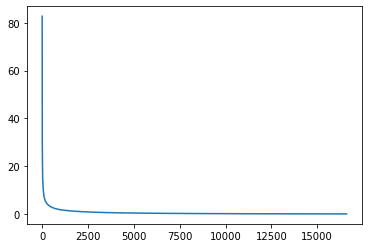

In [24]:
df.Global_Sales.plot()

Takeaway:

- This is NOT the type of videogame listing I thought I'd get
- The assumption was that it was only major hit titles that are charted here but no!
    - not actually the large majority of the listings are not multimillion moving games
    - I it the upper outliers that skew this graph tremendously 